# Demonstration of the lattices for modified RNN-Transducer losses

We demonstrate computational graphs for losses for target "CAT" for 4 input frames.
Unit positions are not visualized, but we show that these labels are preserved.

The notebook is a part of the Final Project, published in https://github.com/artbataev/uol_final

**NB**: `k2` framework requires a separated final state with the arc labeled with `-1`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import necessary libraries
import k2
import torch

In [3]:
# import losses implementation from min_rnnt package (should be installed via `pip install .`)
from min_rnnt.losses import GraphStarTransducerLoss, GraphBypassTransducerLoss, GraphTargetRobustTransducerLoss

## Star-Transducer loss
For dealing with deletions, we augment the loss computation graph with special `<sf>` (skip frame) labels parallel to blank transitions to allow frame skipping.

In [4]:
loss = GraphStarTransducerLoss(blank=0, connect_composed=True)

In [5]:
labels = k2.SymbolTable.from_str("""
    <b> 0
    A 1
    C 2
    T 3
    <sf> 4
""")

### Star-Transducer loss: unit schema

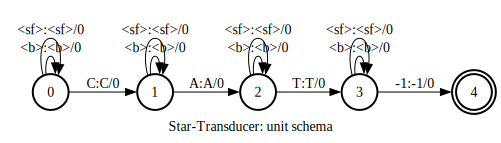

In [6]:
unit_schema = loss.get_unit_schema(torch.tensor([2, 1, 3]), 4)  # CAT
unit_schema.labels_sym = labels
unit_schema.aux_labels_sym = labels
unit_schema.draw("star_transducer_units.svg", title="Star-Transducer: unit schema")

In [7]:
# additionally we store unit positions
unit_schema.unit_positions

tensor([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3, -1], dtype=torch.int32)

### Star-Transducer loss: temporal schema

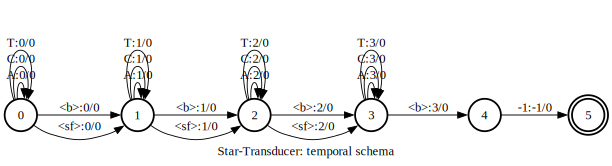

In [8]:
temporal_schema = loss.get_temporal_schema(num_frames=4, vocab_size=4, device=torch.device("cpu"))
temporal_schema.labels_sym = labels
temporal_schema.draw("star_transducer_temporal.svg", title="Star-Transducer: temporal schema")

### Star-Transducer loss: composed lattice (grid)

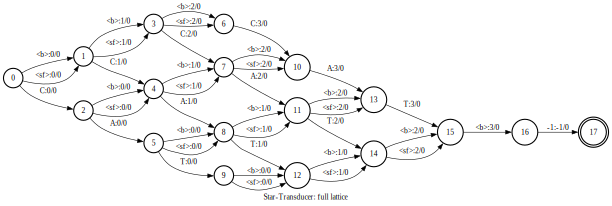

In [9]:
composed_lattice = loss.get_composed_lattice(torch.tensor([2, 1, 3]), num_frames=4, vocab_size=4)
composed_lattice.labels_sym = labels
composed_lattice.draw("star_transducer_composed.svg", title="Star-Transducer: full lattice")

In [10]:
# unit positions are preserved
composed_lattice.unit_positions

tensor([ 0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,  0,  1,  1,  1,  2,  2,  2,
         0,  1,  1,  1,  2,  2,  2,  3,  3,  1,  2,  2,  2,  3,  3,  2,  3,  3,
         3, -1], dtype=torch.int32)

## Bypass-Transducer Loss
For dealing with insertions, we augment the loss computation graph with special `<st>` (skip token) labels parallel to transitions with text labels to allow skipping tokens.

In [11]:
loss = GraphBypassTransducerLoss(blank=0, connect_composed=True)

In [12]:
labels = k2.SymbolTable.from_str("""
    <b> 0
    A 1
    C 2
    T 3
    <st> 4
""")

### Bypass-Transducer loss: unit schema

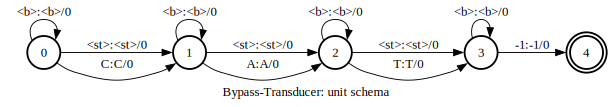

In [13]:
unit_schema = loss.get_unit_schema(torch.tensor([2, 1, 3]), 4)  # CAT
unit_schema.labels_sym = labels
unit_schema.aux_labels_sym = labels
unit_schema.draw("bypass_transducer_units.svg", title="Bypass-Transducer: unit schema")

In [14]:
# additionally we store unit positions
unit_schema.unit_positions

tensor([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3, -1], dtype=torch.int32)

### Bypass-Transducer loss: temporal schema

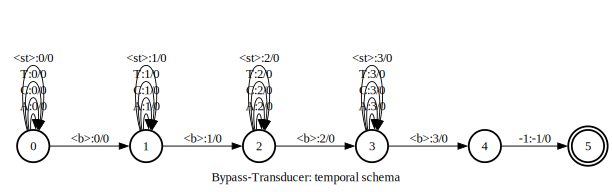

In [15]:
temporal_schema = loss.get_temporal_schema(num_frames=4, vocab_size=4, device=torch.device("cpu"))
temporal_schema.labels_sym = labels
temporal_schema.draw("bypass_transducer_temporal.svg", title="Bypass-Transducer: temporal schema")

### Bypass-Transducer loss: composed lattice (grid)

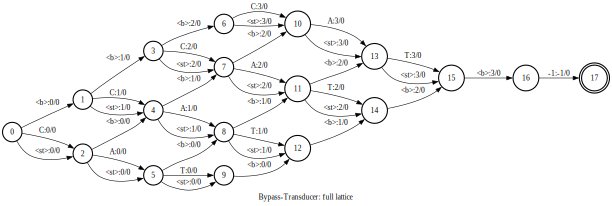

In [16]:
composed_lattice = loss.get_composed_lattice(torch.tensor([2, 1, 3]), num_frames=4, vocab_size=4)
composed_lattice.labels_sym = labels
composed_lattice.draw("bypass_transducer_composed.svg", title="Bypass-Transducer: full lattice")

## Target-Robust-Transducer Loss
For dealing with substitutions and unknown types of errors, we combine Star-Transducer and Bypass-Transducer ideas: the loss computation graph is augmented:
- with special `<st>` (skip token) labels parallel to transitions with text labels to allow skipping tokens
- with `<sf>` (skip frame) labels parallel to blank transitions to allow frame skipping

In [17]:
loss = GraphTargetRobustTransducerLoss(blank=0, connect_composed=True)

In [18]:
labels = k2.SymbolTable.from_str("""
    <b> 0
    A 1
    C 2
    T 3
    <sf> 4
    <st> 5
""")

### Target-Robust-Transducer loss: unit schema

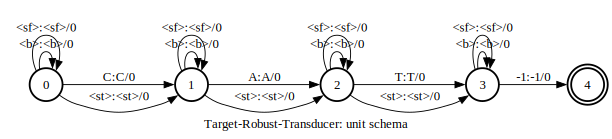

In [19]:
unit_schema = loss.get_unit_schema(torch.tensor([2, 1, 3]), 4)  # CAT
unit_schema.labels_sym = labels
unit_schema.aux_labels_sym = labels
unit_schema.draw("target_robust_transducer_units.svg", title="Target-Robust-Transducer: unit schema")

In [20]:
# additionally we store unit positions
print("Unit positions", unit_schema.unit_positions)

Unit positions tensor([ 0,  0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3, -1],
       dtype=torch.int32)


### Target-Robust-Transducer loss: temporal schema

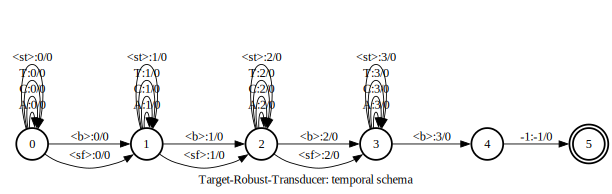

In [21]:
temporal_schema = loss.get_temporal_schema(num_frames=4, vocab_size=4, device=torch.device("cpu"))
temporal_schema.labels_sym = labels
temporal_schema.draw("target_robust_transducer_temporal.svg", title="Target-Robust-Transducer: temporal schema")

### Target-Robust-Transducer loss: composed lattice (grid)

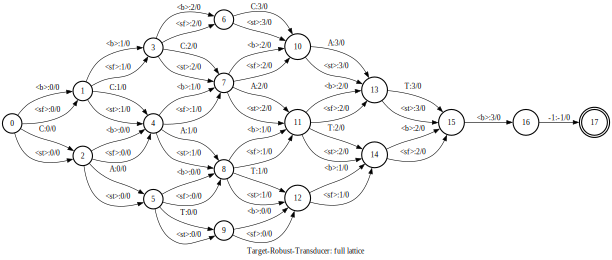

In [22]:
composed_lattice = loss.get_composed_lattice(torch.tensor([2, 1, 3]), num_frames=4, vocab_size=4)
composed_lattice.labels_sym = labels
composed_lattice.draw("target_robust_transducer_composed.svg", title="Target-Robust-Transducer: full lattice")